## ENGR 1330 Final Project - Power Estimator Multiple Regression Prediction Model

<span style="font-size: 1.2em;">**Group Members:**</span>
- MD Rahman

<span style="font-size: 1.2em;">**Group Methodology:**</span>
- \* Coding is a universal priority for all roles. 
- Data Preprocessor/Cleaner: MD Rahman
- Data Analyst: MD Rahman
- Model Programmer: MD Rahman

<span style="font-size: 1.2em;">**Project Brief - Power Output Estimator:**</span>
- Based on multiple power-relevant parameters or predictor variables, 4 inputs, a multiple regression model will be constructed.
- The model will include a user interface where the user can input 4 values to predict the power output based on those given parameters.
- Additionally, the model will demonstrate the functionality of having constant updates, meaning as the user substitutes the values of the given parameters, the variety of data visualizations, including scatterplots and residual plots, will automatically adjust subsequent to rerunning or executing the model again.

<span style="font-size: 1.2em;">**Background Information and Context:**</span>
* The project concerns the estimated power output from a combined-cycle power plant. The power plant, using both a gas and a steam turbine together, produces up to 50% more electricity from the same fuel than a traditional simple-cycle plant. The waste heat from the gas turbine is routed to the nearby steam turbine, which generates extra power.
* The model, aformentioned in the brief, will allow an estimated prediction of energy output based on modifying four given parameters integral in energy production of the combined-cycle power plant: ambient temperature, vacuum, ambient pressure, relative humidity. These four parameters produce PE or power (output) estimated.
* The prediction model is derived from the sample data CSV file titled: ccpp.csv. It hosts pre-gathered sample data from a static report of the estimated power output of a CCPP, combined-cycle power plant. CCPP is how the extended version will be referred to now. This project will develop the model from scratch by dissecting the sample data whilst providing exploratory data analysis.

<span style="font-size: 1.2em;">**Units of Given Parameters**</span>
* Ambient Temperature (AT): Degrees Celsius (°C)
* Exhaust Vacuum (V): cm Hg (centimeters of mercury)
* Ambient Pressure (AP): Millibars (mbar)
* Relative Humidity (RH): Percentage (%)
* Power Output (PE): Megawatts (MW)

<span style="font-size: 1.2em;">**Necessary Modules**:</span>

In [61]:
# Importing necessary libraries for code functionality and model appearenace.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
ccpp = pd.read_csv('ccpp.csv') # reading the file to make the data contents within it accessible as a dataframe named ccpp.

<span style="font-size: 1.2em;">**Data Preprocessing**:</span>

In [63]:
ccpp.isnull().sum() # this pd functianlity displays potential null or n/a values in the data set and the data type of the null values. The null values are 0 so the data type of the integer value of 0 is integer.

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

There are no null values within the data sample, therefore, there is no extra step needed to clean the data.

## Exploratory Data Analysis:

<span style="font-size: 1.2em;">**Basic Analytics of ccpp.csv File Sample Data**:</span>

In [64]:
ccpp.head() # simple 5 rows displaying of the data.
ccpp.info() # The pd info functionality dipslay the data types and their respective number of columns. 
ccpp.describe() # Basic statistical breakdown and outline of the data, including how many lines of each parameter column, mean, std, and the percentile rankings in percentage form. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000

<span style="font-size: 1.2em;">**Relevant Regression Metrics**</span>

<span style="font-size: 1.2em;">Pair Plot:</span>

C:\Users\Admin Account\anaconda3\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Admin Account\AppData\Local\Temp\ipykernel_5596\1236461137.py:2: UserWarning: The figure layout has changed to tight
  pairplot.fig.tight_layout() # tightening the layout for readability.


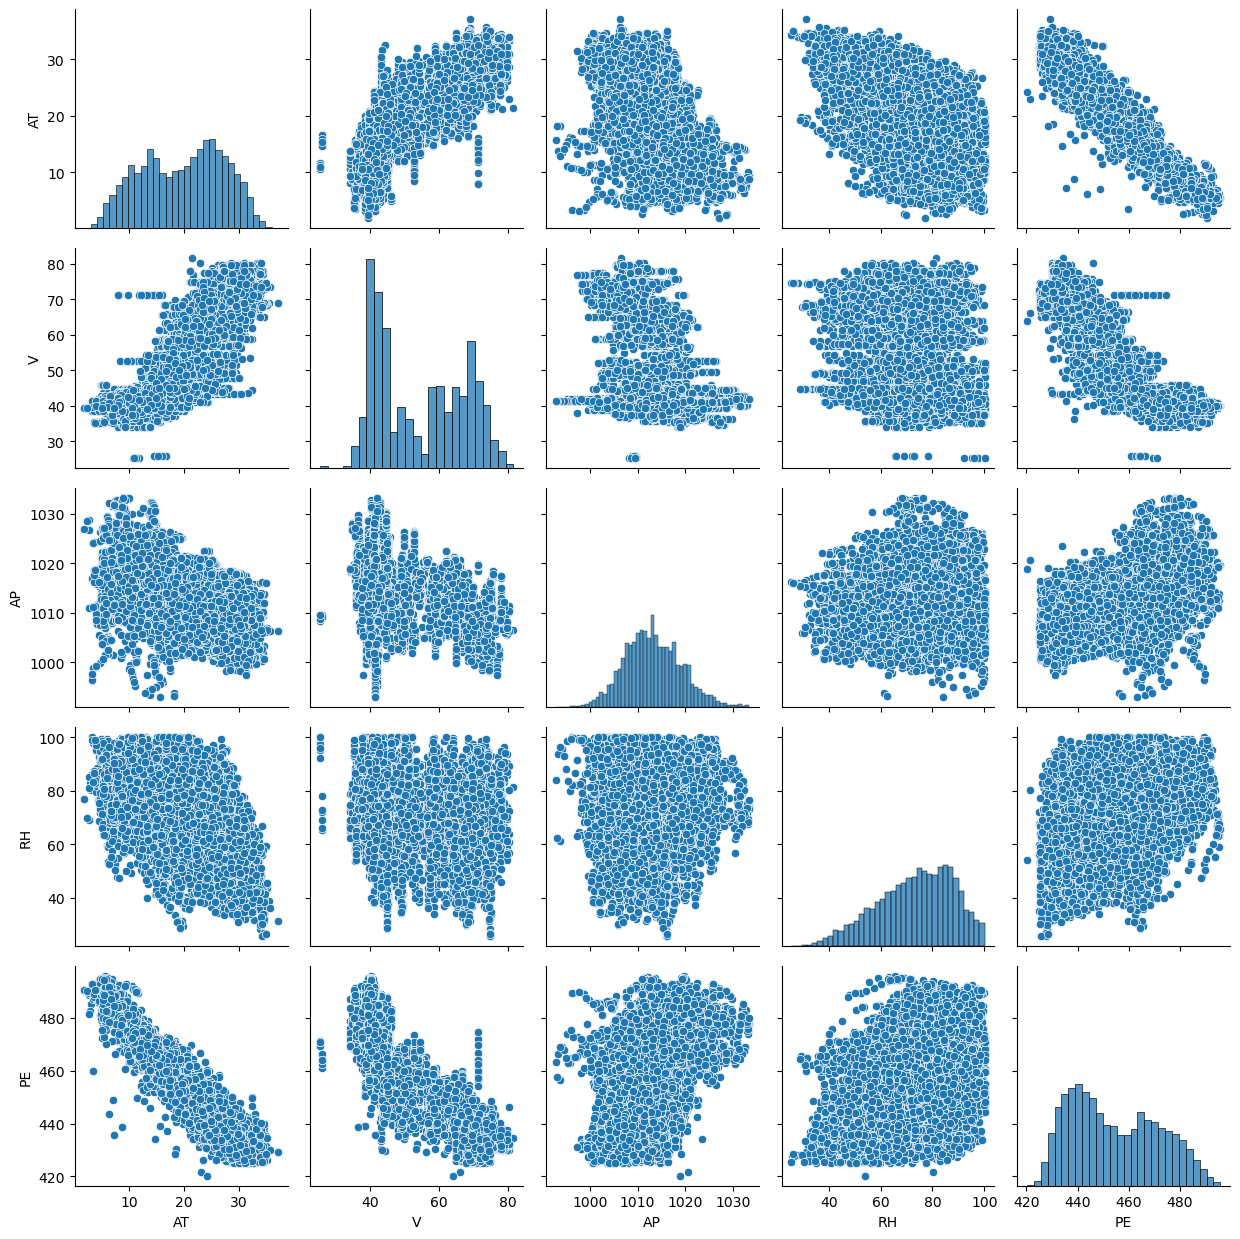

In [65]:
pairplot = sns.pairplot(ccpp)  # choosing a pair plot to display relevant regression metrics. 
pairplot.fig.tight_layout() # tightening the layout for readability.
plt.show() # plt showing the created data visualization graph.
# Please ignore the red error label, it is resultant of changes to the seaborn module library.

<span style="font-size: 1.2em;">Correlation Coefficient Heat Map:</span>

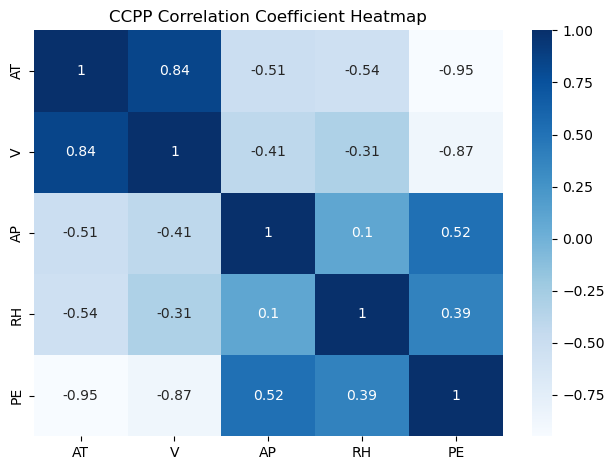

In [66]:
numeric_columns = ccpp.select_dtypes(include=['float64', 'int64']) 
corr = numeric_columns.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("CCPP Correlation Coefficient Heatmap")
plt.tight_layout()
plt.show()

# This code selects the relevant numerical data types, float and integer data types, from within the ccpp.csv file. 
# The corr variable consists of the selected data types subset and a function that take the correlation coefficient of each. 
# The sns.heatmap is then created by taking the correlation values from the corr function of the selected data type subset as the reference data set of values.
# Heatmap attributes are then set, true is to show values in each box, and the color is self explanatory. Finishing touches on the graph including title and then showing the finished graph.

<span style="font-size: 1.2em;">Parameter Relationships Pairs Corresponding to Estimated Power Output:</span>

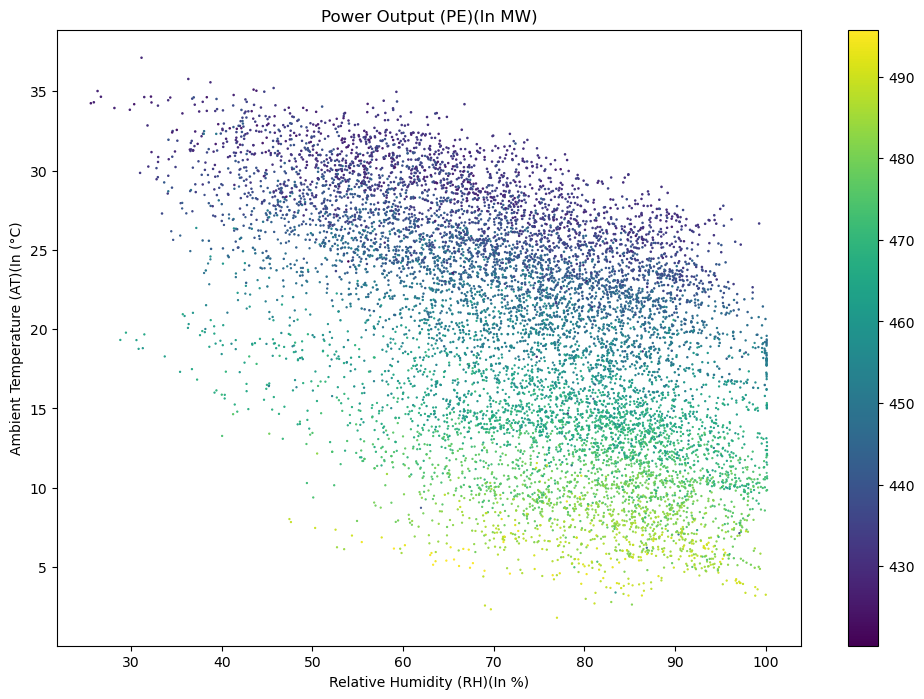

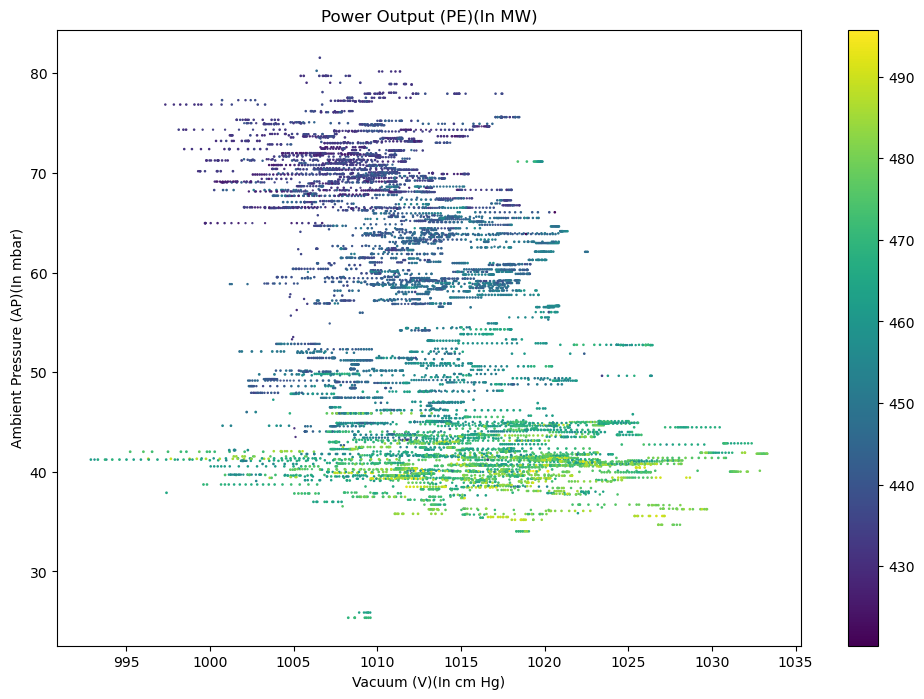

In [56]:
plt.figure(figsize=(12, 8)) # fig size 12, 8 is conventional size for readability.
plt.scatter(ccpp['RH'], ccpp['AT'], c=ccpp['PE'], s=ccpp['V']/100) # choosing the data visualization type scatter plot and then choosing the parameter pair for this visualization. The color is of the power estimated values and the size is based off of the vacuum values column.
plt.colorbar() # color bar displaying the power output. 
plt.xlabel('Relative Humidity (RH)(In %)')
plt.ylabel('Ambient Temperature (AT)(In (°C)') # axis labeling 
plt.title('Power Output (PE)(In MW)')
plt.show()

plt.figure(figsize=(12, 8)) # convention
plt.scatter(ccpp['AP'], ccpp['V'], c=ccpp['PE'], s=ccpp['RH']/100) 
plt.colorbar() # second parameter relationship pair 
plt.xlabel('Vacuum (V)(In cm Hg)')
plt.ylabel('Ambient Pressure (AP)(In mbar)') # axis labeling
plt.title('Power Output (PE)(In MW)')
plt.show()

<span style="font-size: 1.2em;">Residuals - Homoscedasticity and Q-Q Plot:</span>

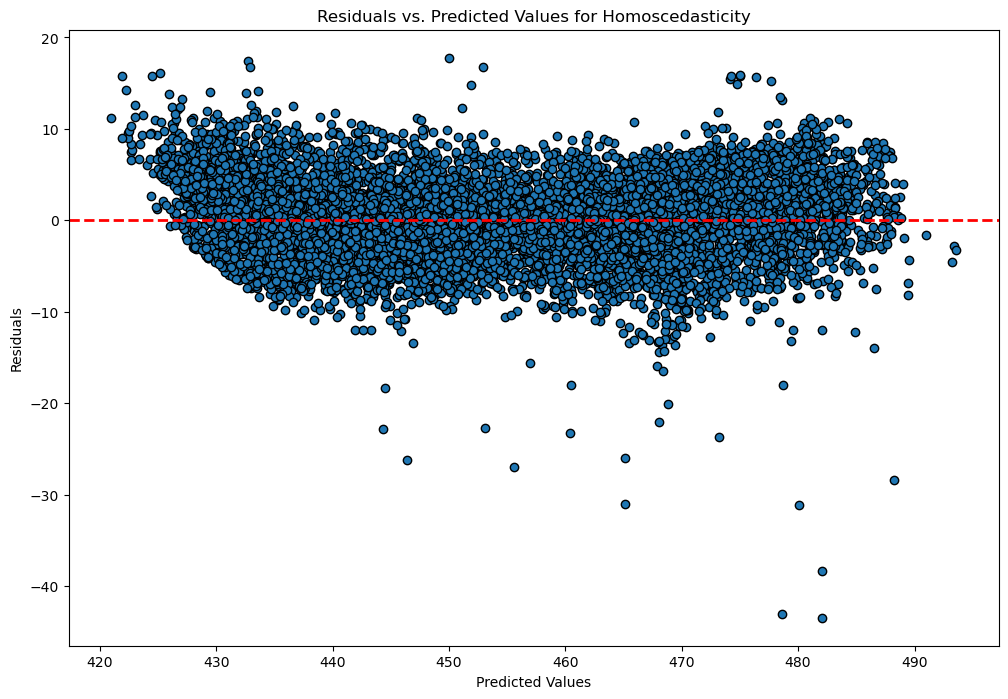

The close fit of the plotted value points to the dotted line along with sparse outliers, compared to the large number of values following the normal trend, shows that the residuals are heteroscedastic.


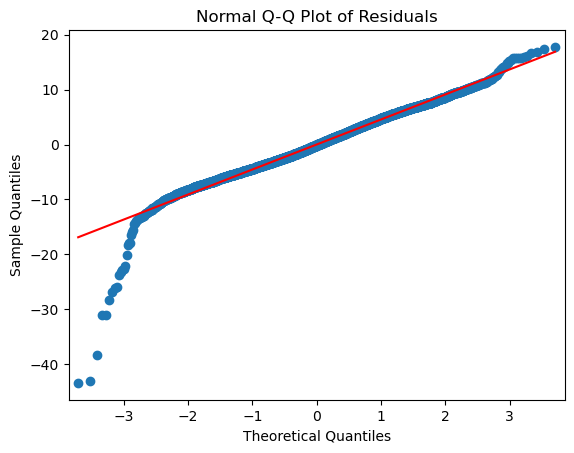

The close fit of the residual line all the way through, with natural deviation in the beginning, implies that the residuals are normally distributed.


In [57]:
model = sm.OLS(y, X).fit()
residuals = y - model.predict(X)  # Calculate residuals

plt.figure(figsize=(12, 8))  # convention
plt.scatter(model.predict(), residuals, edgecolor='black')  # choosing attribute under umbrella of model analysis options, chosen is residuals. 
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # the creation of the data visualization model scatter plot referencing the model dataframe (ccpp csv file) predict function.
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')  # axis labeling
plt.title('Residuals vs. Predicted Values for Homoscedasticity')
plt.show()

print("The close fit of the plotted value points to the dotted line along with sparse outliers, compared to the large number of values following the normal trend, shows that the residuals are heteroscedastic.")

sm.qqplot(residuals, line='s')  # the qqplot data visualization plots the reliability of the distribution of residuals. 
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

print("The close fit of the residual line all the way through, with natural deviation in the beginning, implies that the residuals are normally distributed.")

<span style="font-size: 1.2em;">Variance Inflation Factor (VIF):</span>

In [58]:
vif_data = pd.DataFrame() # function to create an empty dataframe 
vif_data["Variable"] = X.columns # the x columns of the ccpp csv file. 
vif_data["VIF"] = [variance_inflation_factor(sm.add_constant(X).values, i) for i in range(len(X.columns))] # the VIF inflation factor is applied to all the x variable parameters. 
vif_data # displaying VIF data  

Variable           VIF
0    const  43761.151866
1       AT      5.977602
2        V      3.943003
3       AP      1.452639
4       RH      1.705290

<span style="font-size: 1.2em;">Multiple Regression Metric Summary:</span>

In [59]:
X = ccpp[['AT', 'V', 'AP', 'RH']] 
y = ccpp['PE'] 
X = sm.add_constant(X) # Just a model summary of the parameters and the power output utilizing the ols function which gives regression summaries.
model = sm.OLS(y, X).fit()
pred = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:01:30   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

### Multiple Regression Prediction Model - Estimated Power Output

Sample Parameters: AT - 14.96,V - 41.76,AP - 1024.07,RH - 73.17,PE - 463.26

Also, the previous scatter plot interations staying visible after the new input iteration is developer-side. User-side, with new inputs, only that set of regression scatter plots appear and stay vissible.

Enter ambient temperature (AT) in °C:  4
Enter vacuum (V) in cm Hg:  80
Enter ambient pressure (AP) in mbar:  1030
Enter relative humidity (RH) in %:  85


Predicted Power Output: [478.49674143]


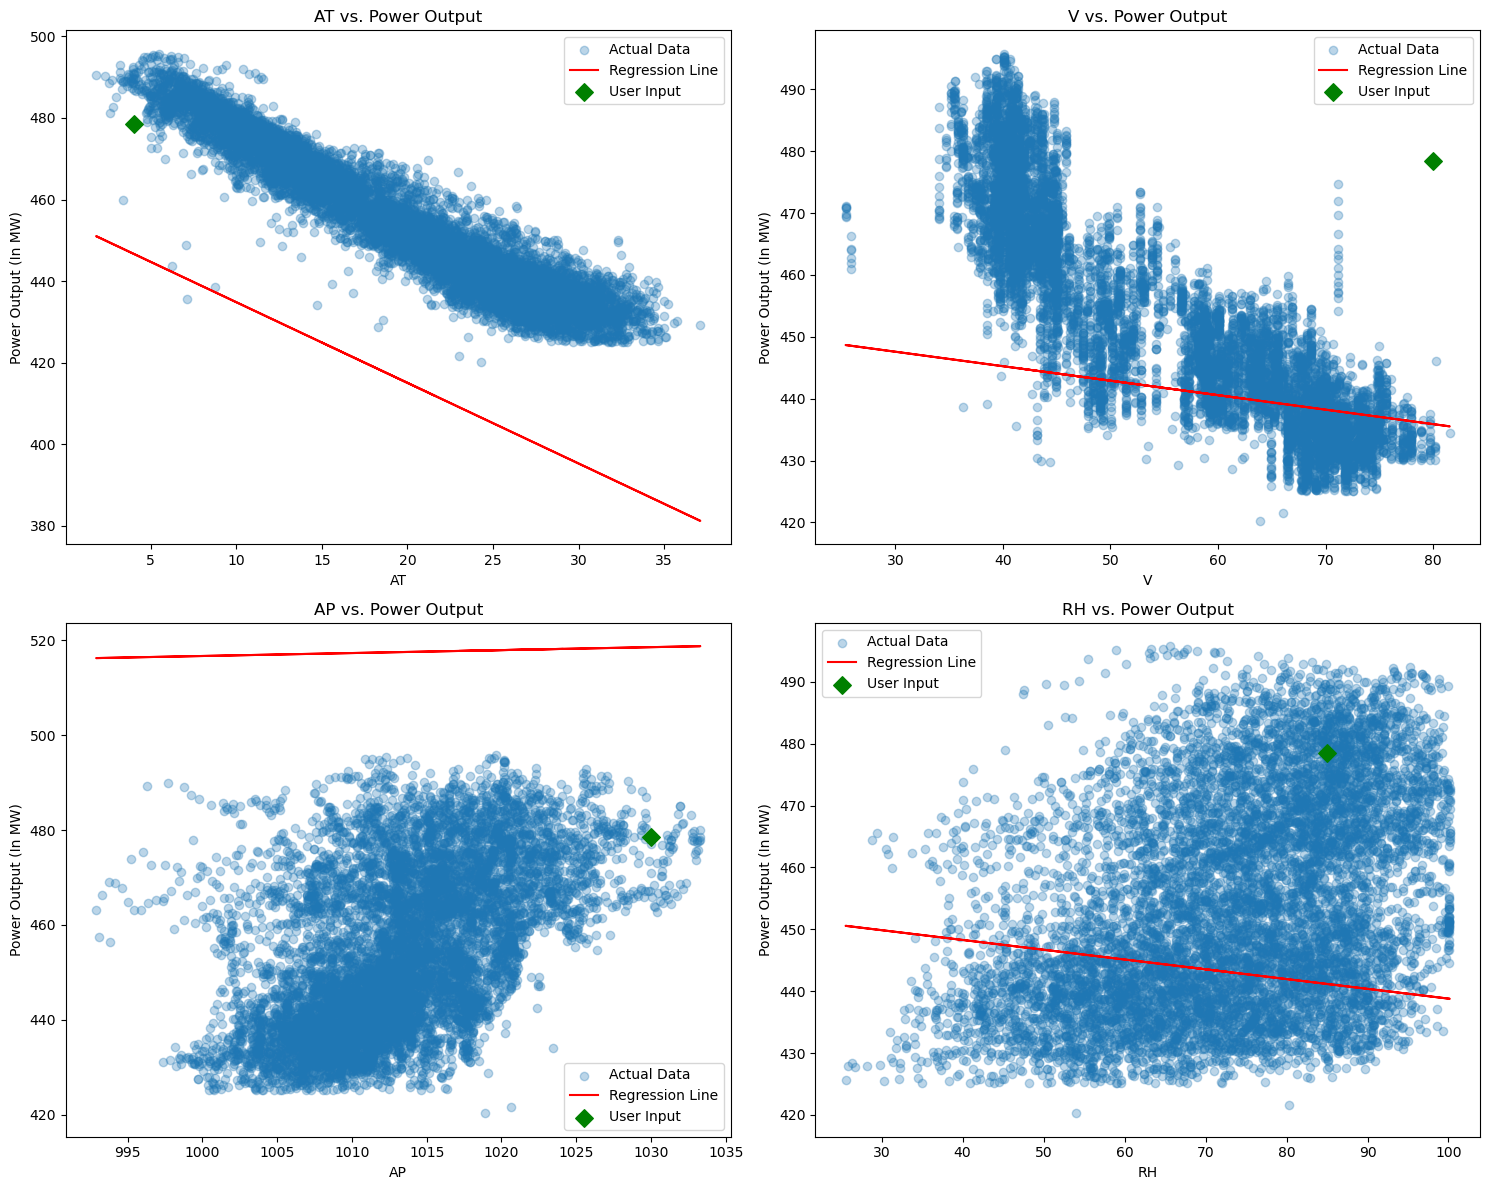

Do you want to enter new values? (yes/no):  yes
Enter ambient temperature (AT) in °C:  15
Enter vacuum (V) in cm Hg:  43
Enter ambient pressure (AP) in mbar:  1024
Enter relative humidity (RH) in %:  73


Predicted Power Output: [466.92315646]


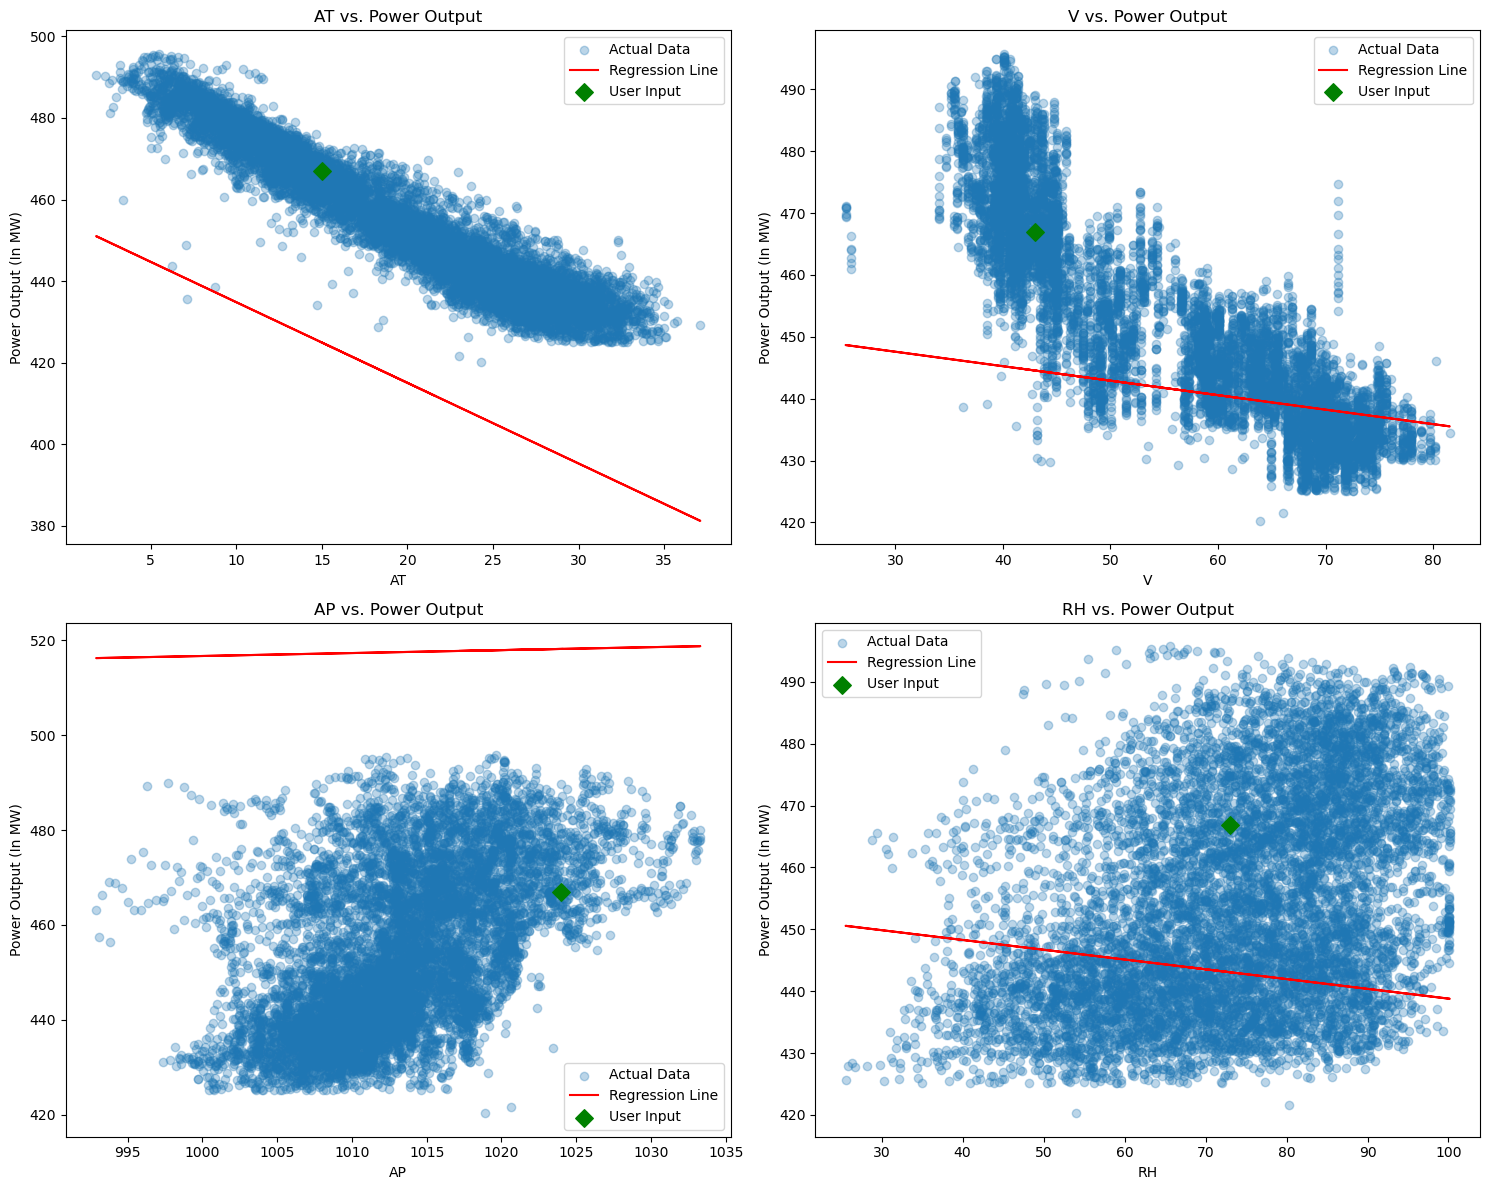

Do you want to enter new values? (yes/no):  no


In [67]:
while True:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))  # Create a new figure and axes for each iteration
    
    ambient_temp_input = float(input("Enter ambient temperature (AT) in °C: "))
    vacuum_input = float(input("Enter vacuum (V) in cm Hg: "))  # User input for parameters
    ambient_pressure_input = float(input("Enter ambient pressure (AP) in mbar: "))
    relative_humidity_input = float(input("Enter relative humidity (RH) in %: "))

    prediction = model.predict([1, ambient_temp_input, vacuum_input, ambient_pressure_input, relative_humidity_input])
    print(f"Predicted Power Output: {prediction}")  # Predict power output based on user input

    for i, param in enumerate(['AT', 'V', 'AP', 'RH']):
        axes.flatten()[i].scatter(ccpp[param], y, alpha=0.3, label='Actual Data')
        axes.flatten()[i].set_title(f'{param} vs. Power Output')
        axes.flatten()[i].set_xlabel(param)
        axes.flatten()[i].set_ylabel('Power Output (In MW)')
        
        reg_line = model.params['const'] + model.params[param] * ccpp[param]
        axes.flatten()[i].plot(ccpp[param], reg_line, color='red', label='Regression Line')
        
        # Use the user input directly for the scatter plot of the green diamond
        axes.flatten()[i].scatter(ambient_temp_input if param == 'AT' else
                                  vacuum_input if param == 'V' else
                                  ambient_pressure_input if param == 'AP' else
                                  relative_humidity_input,
                                  prediction,
                                  color='green', marker='D', s=80, label='User Input')
        
        axes.flatten()[i].legend()
    
    plt.tight_layout()
    plt.show()

    continue_prompt = input("Do you want to enter new values? (yes/no): ").lower()

    if continue_prompt != 'yes':
        break


The above multiple regression prediction model also includes an update functionality where the user is asked to input new values post-creation of the four regression models. Upon the user entering the new values of the parameters, new regression models are created and the multiple regression models from the previous wave of values are overwrited.

# Model Analysis

## Introduction

The four multiple regression prediction models derived from the four inputted parameter values consisst of each scatter plot displaying their relationship to the generated power output. Each model is denoted by a legend, a regression line showcasing correlation trends, actual data, and the user-inputted parameter value.

## Parameter Relationships

As aforementioned by the parameter pair relationship scatter plots, ambient temperature is related to relative humidity, while ambient pressure is related to vacuum. When analyzing the four models, emphasis on comparing the inputted values to the actual data must include priority on pair relationships.

## Criteria Thresholds - Analytical Application

*Thresholds are derived from the number of x tick marks that allow users to understand numerically the optimal amounts of parameter values to derive the highest amount of energy possible.
*Thresholds are structured by taking into account a minimum and maximum power output in the form (minimum power output designation, maximum power output designation).

## Power Output Thresholds - 0 to 500 MW Range

- **0 MW:** Inactive, or in a conservative active stage.
- **380 MW:** Nonoptimal
- **400 MW:** Suboptimal
- **420 MW:** Moderate
- **440 MW:** Optimal
- **460 MW:** High Optimal
- **480 MW:** Very High Optimal
- **500 MW:** Maximum

## Vacuum Value Thresholds - 0 to 80 cm Hg Range

- **0 cm Hg:** Inactive, or in a conservative active stage
- **38 - 44 cm Hg:** High optimal, maximum (maximal expected power output, expected to be around 500 MW at 40 cm Hg of vacuum)
- **45 - 67 cm Hg:** Moderate, high optimal
- **68 - 80 cm Hg:** Low moderate, optimal

## Ambient Temperature Value Thresholds - 0 to 35 °C Range

- **0 °C:** Inactive, or in a conservative active stage
- **3 - 10 °C:** High optimal, very high optimal
- **11 - 15 °C:** Optimal, very high optimal
- **16 - 20 °C:** Optimal, high optimal
- **21 - 25 °C:** Moderate, high optimal 
- **26 - 35 °C:** Moderate, optimal 

## Ambient Pressure Value Thresholds - 990 to 1035 mbar Range

- **990 - 1000 mbar:** Moderate, very high optimal
- **1001 - 1005 mbar:** Moderate, very high optimal
- **1006 - 1010 mbar:** Moderate, very high optimal
- **1011 - 1015 mbar:** Moderate, very high optimal
- **1016 - 1020 mbar:** Moderate, very high optimal
- **1021 - 1025 mbar:** Optimal, very high optimal
- **1026 - 1030 mbar:** High optimal, very high optimal
- **1031 - 1035 mbar:** High optimal, very high optimal

## Relative Humidity Value Thresholds - 25 to 100 % Range

- **25 - 30 %:** Moderate, moderate
- **30 - 40 %:** Moderate, high optimal
- **41 - 50 %:** Moderate, high optimal
- **51 - 60 %:** Moderate, high optimal 
- **61 - 70 %:** Moderate, very high optimal
- **71 - 80 %:** Moderate, very high optimal
- **81 - 90 %:** Moderate, very high optimal
- **91 - 100 %:** Moderate, very high optimal

*Universal Note: In all the models, the user-inputted value is marked by a green diamond. The user-inputted value is then compared to the plotted actual data points. Utilizing the actual data points as a basis for comparison allows the user to analyze whether their inputted value fits the correlation trend for power output generated for the specific parameter value.

## AT vs. Power Output Model

The regression line for this model measures as a strong negative correlation, indicating that as AT values increase, the resultant power output decreases. Along with the regression line, the general pattern and volume of actual plotted value points form in a negative slope, supporting the negative correlation trend.

## AP vs. Power Output Model

The regression line for this model measures as a slight positive correlation, indicating that as AP values increase, the resultant power output increases. Along with the regression line, the general pattern and volume of actual plotted value points form in more of an increasing mass of points moving upward, supporting the positive correlation trend.

## V vs. Power Output Model

The regression line for this model measures as a moderate negative correlation, indicating that as V values increase, the resultant power output decreases. Along with the regression line, the general pattern and volume of actual plotted value points form in a negative slope, supporting the negative correlation trend.

## RH vs. Power Output Model

The regression line for this model measures as a slight negative correlation, indicating that as RH values increase, the resultant power output decreases. Along with the regression line, the general pattern and volume of actual plotted value points form in a negative slope, supporting the negative correlation trend. While there is an appearance of the actual plotted points skewing upwards as V values increase, many value points are overlapped against each other, especially the large volume of points shaping a negative shape of actual data, proving a slight negative correlation trend. The increasing mass of plotted value points counteract a moderate negative correlation designationinto a slight designation while taking into account overlapping value points.


# Conclusion

This conclusion section will focus on relaying the four correlation trends of the four parameters and giving the highest efficiency thresholds for power output for each parameter. Utilizing and combining each highest efficiency threshold for each parameter will yield the greatest power output.

## Correlation Trends

- **RH vs. Power Output:** Slight negative correlation, indicating that as RH values increase, the resultant power output decreases.
- **V vs. Power Output:** Moderate negative correlation, indicating that as V values increase, the resultant power output decreases.
- **AT vs. Power Output:** Strong negative correlation, indicating that as AT values increase, the resultant power output decreases.
- **AP vs. Power Output:** Slight positive correlation, indicating that as AP values increase, the resultant power output increases.

## Epitome Efficiency Thresholds For Each Parameter

*Remember, the designations and minimum parameter ranges are switched for negative correlation trends. For example, for AT, 10 is high optimal while 3 is very high optimal.*

- **RH:** 81 - 90 %: Moderate, very high optimal
- **V:** 38 - 44 cm Hg: High optimal, maximum (maximal expected power output, expected to be around 500 MW at 40 cm Hg of vacuum)
- **AT:** 3 - 10 °C: High optimal, very high optimal 
- **AP:** 1026 - 1030 mbar: High optimal, very high optimal

## Sample Parameter Values Test

```python
Enter ambient temperature (AT) in °C: 4
Enter vacuum (V) in cm Hg: 38
Enter ambient pressure (AP) in mbar: 1030
Enter relative humidity (RH) in %: 85
Predicted Power Output: 488.32123117702014
